In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

url = 'https://github.com/jiechengh/mgt301/blob/main/airbnb_sin_nyc.csv?raw=true'
airbnb = pd.read_csv(url, index_col=0)
airbnb.dropna(inplace=True)
airbnb.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,City
id,,,,,,,,,,,,,,,,
49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365,Singapore
50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365,Singapore
56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365,Singapore
71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353,Singapore
71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355,Singapore


In [2]:
numeric_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
               'calculated_host_listings_count', 'availability_365']

def drop_outliers_iqr(df, column, selected_cols):
    if column in selected_cols:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        no_outliers = df[(df[column] >= lower) & (df[column] <= upper)]
        return no_outliers
    
    else:
        return df

for col in airbnb.columns:
    airbnb = drop_outliers_iqr(airbnb, col, numeric_cols)

# Seaborn

https://seaborn.pydata.org/tutorial/color_palettes.html

In [3]:
sns.set_palette('Set2')
sns.set_style('dark')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

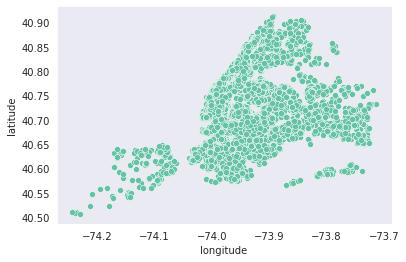

In [4]:
sns.scatterplot(data=airbnb[airbnb['City']=='NYC'], x='longitude', y='latitude')

Text(0.5, 1.0, 'Number of Reviews vs Reviews per Month')

/usr/local/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


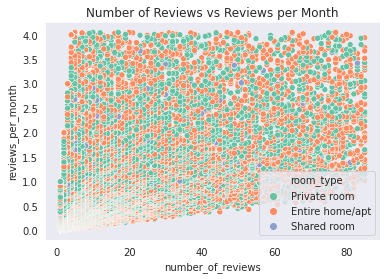

In [5]:
sns.scatterplot(data=airbnb, x='number_of_reviews', y='reviews_per_month', hue='room_type')
plt.title('Number of Reviews vs Reviews per Month')

Text(0.5, 1.0, 'Price Distribution')

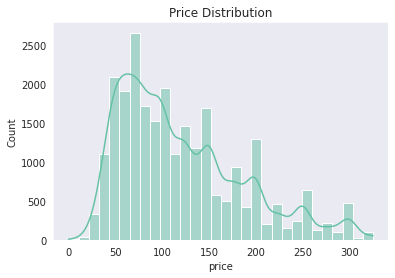

In [6]:
sns.histplot(data=airbnb, x='price', bins=30, kde=True)
plt.title('Price Distribution')

kde

bool
If True, compute a kernel density estimate to smooth the distribution and show on the plot as (one or more) line(s). Only relevant with univariate data.

/usr/local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution')

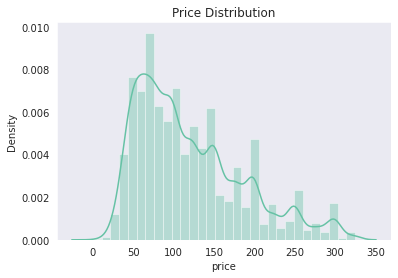

In [7]:
sns.distplot(airbnb['price'], bins=30, kde=True)
plt.title('Price Distribution')

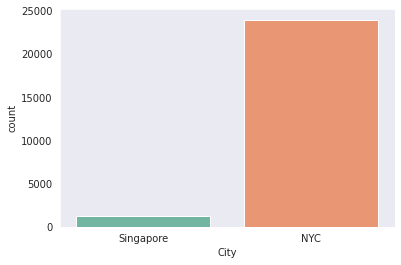

In [8]:
ax = sns.countplot(data=airbnb, x='City')
# ax.bar_label(ax.containers[0])

In [9]:
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.3.4


<AxesSubplot:xlabel='room_type', ylabel='price'>

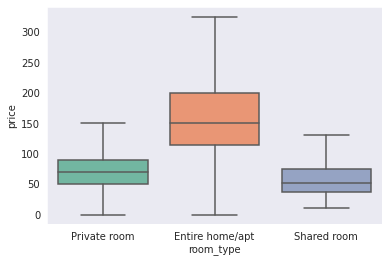

In [10]:
sns.boxplot(data=airbnb, x='room_type', y='price', showfliers=False)

<AxesSubplot:>

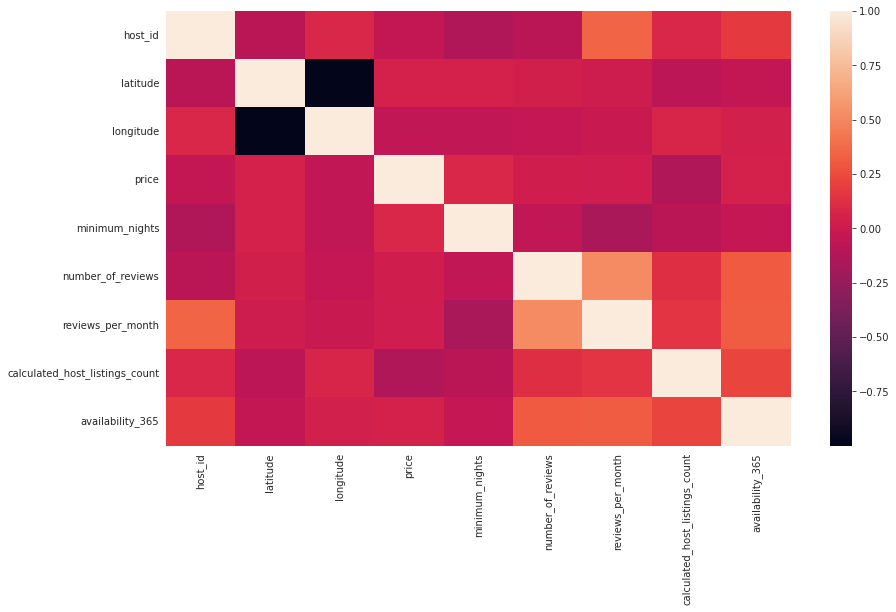

In [11]:
corr = airbnb.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr)

## `relplot`: 

This function provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets. 

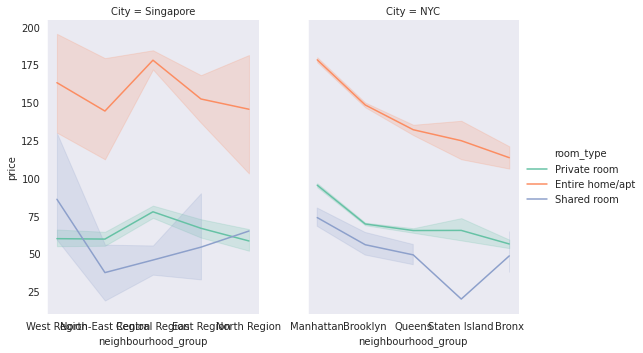

In [12]:
sns.relplot(
    data=airbnb,
    x="neighbourhood_group", y="price",
    hue="room_type", col="City",
    kind="line", size_order=["Private room", "Entire home/apt", 'Shared room'],
    height=5, aspect=.75, facet_kws=dict(sharex=False))


# `jointplot`: 

Grid for drawing a bivariate plot with marginal univariate plots.

This function provides a convenient interface to the JointGrid class, with several canned plot kinds.

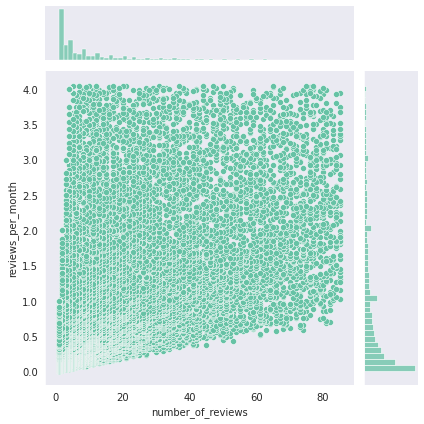

In [13]:
sns.jointplot(data=airbnb, x='number_of_reviews', y='reviews_per_month')

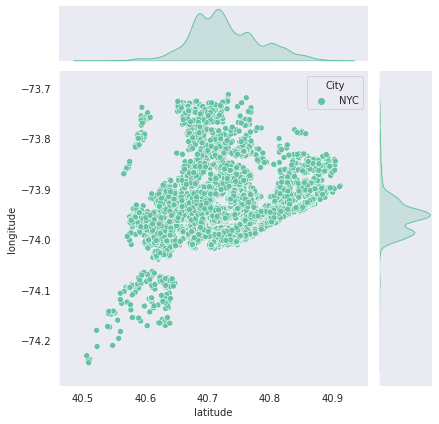

In [14]:
sns.jointplot(data=airbnb[airbnb['City']=='NYC'], x="latitude", y="longitude", hue="City")

# `stripplot`: 

Draw a categorical scatterplot using jitter to reduce overplotting.

to visualise the distribution of many individual one-dimensional values

<AxesSubplot:xlabel='room_type', ylabel='price'>

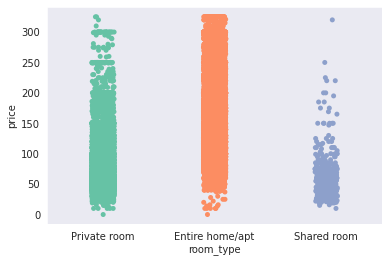

In [16]:
sns.stripplot(data=airbnb, x='room_type', y='price')

# `violinplot`: 

Draw a patch representing a KDE and add observations or box plot statistics.

`seaborn.violinplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, inner='box', split=False, width=0.8, dodge='auto', gap=0, linewidth=None, linecolor='auto', cut=2, gridsize=100, bw_method='scott', bw_adjust=1, density_norm='area', common_norm=False, hue_norm=None, formatter=None, log_scale=None, native_scale=False, legend='auto', scale=<deprecated>, scale_hue=<deprecated>, bw=<deprecated>, inner_kws=None, ax=None, **kwargs)`

<AxesSubplot:xlabel='room_type', ylabel='price'>

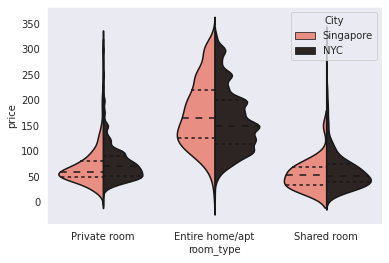

In [17]:
sns.violinplot(data=airbnb, x="room_type", y="price", hue="City",palette = "dark:salmon_r",
               split=True, inner="quart", fill=False)